In [1]:
import pandas as pd
import numpy as np
import math
import json
from statsmodels.imputation import mice
from statsmodels.imputation.mice import MICEData



In [41]:
# read in the json files
portfolio = pd.read_json('../data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('../data/profile.json', orient='records', lines=True)
transcript = pd.read_json('../data/transcript.json', orient='records', lines=True)

In [42]:
profile["became_member_on"] = pd.to_datetime(profile["became_member_on"],format="%Y%m%d")
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [43]:
profile["became_member_on"].max()

Timestamp('2018-07-26 00:00:00')

In [44]:
profile.isna().sum()/profile.shape[0]*100

gender              12.794118
age                  0.000000
id                   0.000000
became_member_on     0.000000
income              12.794118
dtype: float64

In [74]:
profile["member_since"] = (profile["became_member_on"] - pd.to_datetime('2019-07-26')).dt.days
profile["member_since"] = abs(profile["member_since"].astype(int))
profile.head()

,gender,age,id,became_member_on,income,member_since
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,78000.0,894
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,741
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,50000.0,379
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,808
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,95000.0,721


In [75]:
profile.head()

,gender,age,id,became_member_on,income,member_since
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,78000.0,894
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,741
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,50000.0,379
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,808
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,95000.0,721


In [47]:
profile.dtypes

gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
member_since                 int64
dtype: object

In [77]:
import statsmodels as sm

In [78]:
#imp = mice.MICEData(profile[["income","member_since","age"]])
#fml = 'income ~  member_since + age'
#mice = mice.MICE(fml, sm.regression.linear_model.OLS, imp)
#results = mice.fit(10, 10)
#print(results.summary())

In [79]:
imp = mice.MICEData(profile[["income","member_since","age"]])
imp.set_imputer('income', formula='member_since + age')

for j in range(20):
    imp.update_all()

profile["income"] = imp.data["income"]

In [80]:
profile.head()

,gender,age,id,became_member_on,income,member_since
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,78000.0,894
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,741
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,50000.0,379
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,808
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,95000.0,721


In [81]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [98]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [105]:
def filter_offer(r):
    if "offer id"   in r.keys():
        return r["offer id"]
    elif "offer_id"   in r.keys():
        return r["offer_id"]
    else:
        return np.nan

transcript["offer_id"] = transcript["value"].apply(filter_offer)

In [106]:
def filter_amount(r):
    if "amount" in r.keys():
        return r["amount"]
    else:
        return np.nan

transcript["amount"] = transcript["value"].apply(filter_amount)

<AxesSubplot:ylabel='Frequency'>

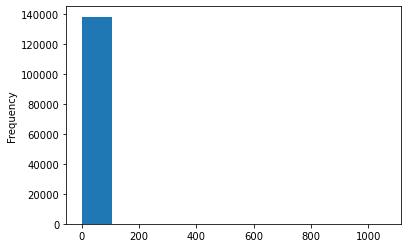

In [102]:
transcript["amount"].dropna().astype(float).plot(kind="hist")

In [54]:
print(profile.shape,transcript.shape)
pd.merge(profile,transcript,left_on="id",right_on="person").shape

(17000, 6) (306534, 4)


(306534, 10)

In [107]:
transcript.loc[transcript["person"]=="78afa995795e4d85b5d9ceeca43f5fef"]

,person,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,NaN,19.89
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,NaN,17.78
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,5a8bc65990b245e5a138643cd4eb9837,NaN
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216,5a8bc65990b245e5a138643cd4eb9837,NaN
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222,NaN,19.67
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240,NaN,29.72
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378,NaN,23.93


In [117]:
only_transactions = transcript.loc[transcript["event"]=="transaction"]
only_transactions.head()

,person,event,value,time,offer_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,NaN,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,NaN,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,NaN,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,NaN,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,NaN,18.97


In [121]:
only_transactions = only_transactions.groupby("person")["amount"].agg(["mean","std"])
only_transactions.columns = 

,mean,std
person,,
0009655768c64bdeb2e877511632db8f,15.950000,6.572805
00116118485d4dfda04fdbaba9a87b5c,1.363333,1.601572
0011e0d4e6b944f998e987f904e8c1e5,15.892000,6.292688
0020c2b971eb4e9188eac86d93036a77,24.607500,6.331932
0020ccbbb6d84e358d3414a3ff76cffd,12.837500,4.284117
...,...,...
fff3ba4757bd42088c044ca26d73817a,52.816364,111.327383
fff7576017104bcc8677a8d63322b5e1,4.990000,2.027244
fff8957ea8b240a6b5e634b6ee8eafcf,2.430000,2.493080


In [55]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [56]:
import numpy as np
def get_channels(r):
    channels = [0 for _ in range(4)]
    if "email" in r:
        channels[0] = 1
    if "mobile" in r:
        channels[1] = 1
    if "social" in r:
        channels[2] = 1
    if "web" in r:
        channels[3] = 1
    return channels

portfolio["channels_encoded"] = portfolio["channels"].apply(get_channels)

In [57]:
portfolio["channels"]

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

In [63]:

#portfolio = 
pd.concat([portfolio,\
           pd.DataFrame(portfolio.channels_encoded.tolist(),\
           columns=["email","mobile","social","web"], index= portfolio.index)],
          axis=1)

,reward,channels,difficulty,duration,offer_type,id,channels_encoded,email,mobile,social,web
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,"[1, 1, 1, 0]",1,1,1,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,"[1, 1, 1, 1]",1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,"[1, 1, 0, 1]",1,1,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[1, 1, 0, 1]",1,1,0,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,"[1, 0, 0, 1]",1,0,0,1
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,"[1, 1, 1, 1]",1,1,1,1
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,"[1, 1, 1, 1]",1,1,1,1
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,"[1, 1, 1, 0]",1,1,1,0
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,"[1, 1, 1, 1]",1,1,1,1
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,"[1, 1, 0, 1]",1,1,0,1


In [125]:
portfolio.shape

(10, 7)

In [124]:
transcript.loc[transcript["offer_id"]=="9b98b8c7a33c4b65b9aebfe6a799e6d9"]

,person,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
18,ebe7ef46ea6f4963a7dd49f501b26779,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
21,f082d80f0aac47a99173ba8ef8fc1909,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
28,c0d210398dee4a0895b24444a5fcd1d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
30,57dd18ec5ddc46828afb81ec5977bef2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
...,...,...,...,...,...,...
306348,087d0fcdbf294f7494a96d8d6a56cf41,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,714,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
306410,b13eaeb7a91e415a972c9ebc7f63ac57,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,714,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
306423,8771f96bc7f947c09a8f78ee2e14a1a7,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,714,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
306430,0355c6a5fdbc429ea5b05e8a9ecd2eae,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,714,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN


https://stefvanbuuren.name/fimd/sec-pmm.html